In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
import pathlib
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex8.python.libs import *

In [3]:
mpl.rcParams['figure.dpi'] = 150

# Anomaly detection with Gaussian distribution

In [4]:
data = sio.loadmat('../../data/ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].ravel()

## Plot feature histrogram

the distribution shuld all look like Gaussian distribution.

If there are features doesn't look like Gaussian distribution, we should try multiple transformation to the feature to make it look like one.

possible transformation functions are
- $x \gets \log(x + \text{constant})$
- $x \gets \sqrt[k]{x}$

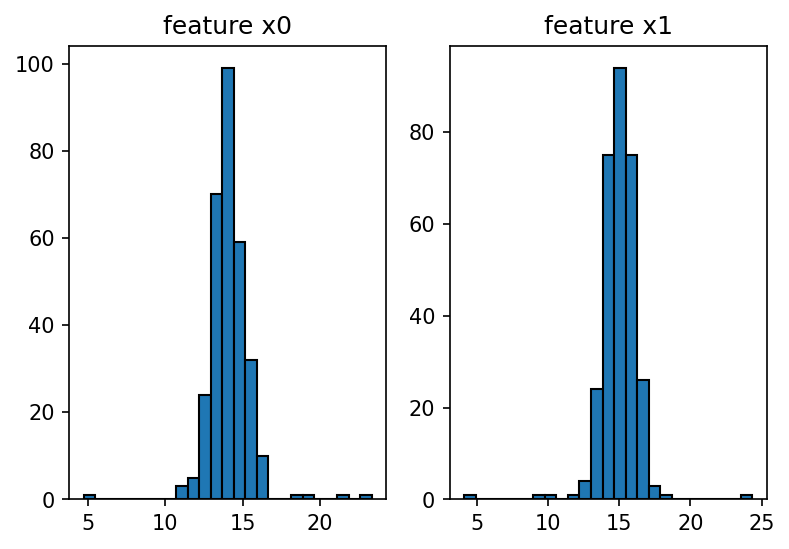

In [5]:
plot_feature_hist(X);

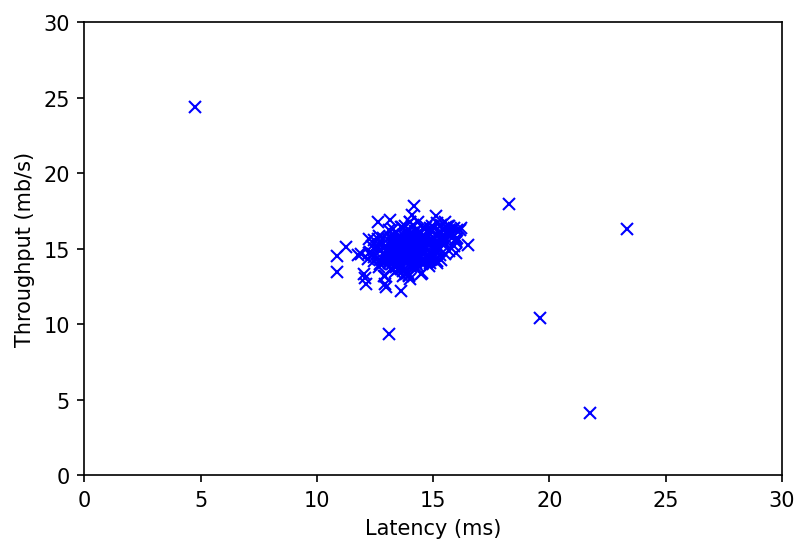

In [6]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bx')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughput (mb/s)');

In [7]:
mu, sigma2 = estimate_gaussian(X)

In [8]:
p = estimate_gaussian_density(X, mu, sigma2)

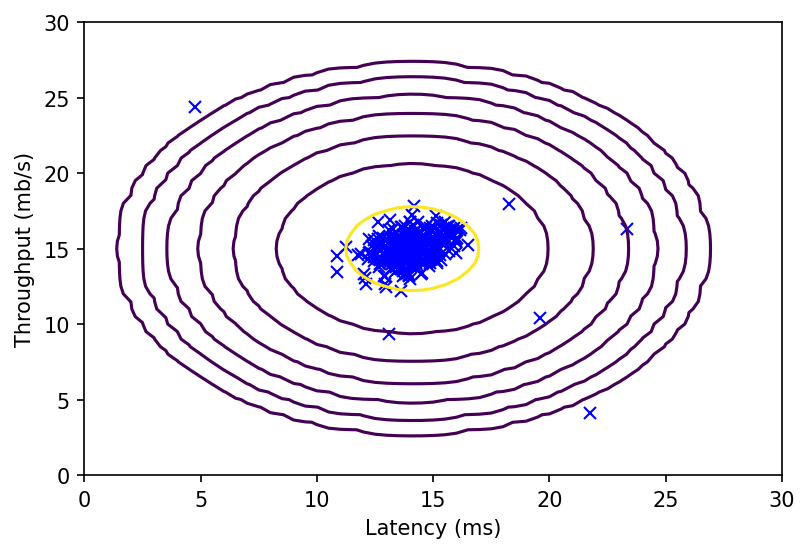

In [9]:
ax = visualize_fit(X, mu, sigma2, estimate_gaussian_density)
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughput (mb/s)');

In [10]:
pval = estimate_gaussian_density(Xval, mu, sigma2)
epsilon, f1 = select_threshold(yval, pval)
print(f'''Best epsilon found using cross-validation: {epsilon:e}
Best F1 on Cross Validation Set: {f1:f}
# Outliers found: {(p < epsilon).sum()}
    (you should see a value epsilon of about 8.99e-05)
''')

Best epsilon found using cross-validation: 9.008871e-05
Best F1 on Cross Validation Set: 0.875000
# Outliers found: 6
    (you should see a value epsilon of about 8.99e-05)



In [11]:
outliers = (p < epsilon)

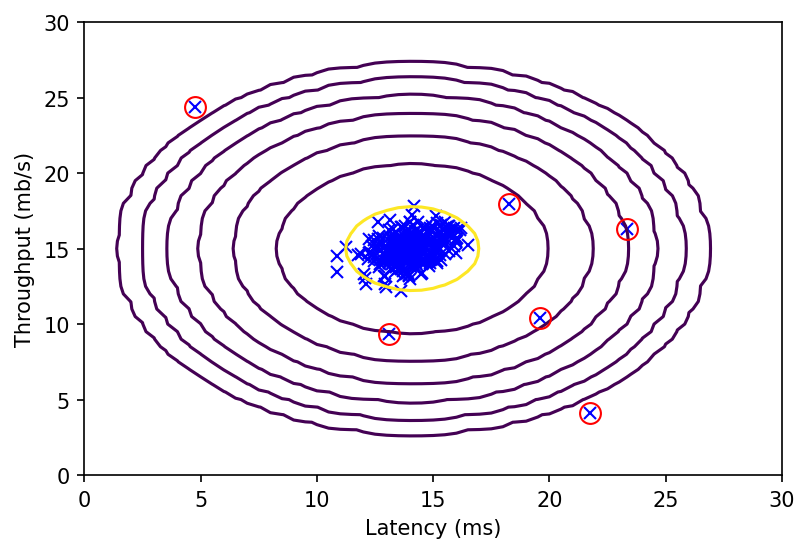

In [12]:
ax = visualize_fit(X, mu, sigma2, estimate_gaussian_density)
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughput (mb/s)');
ax.plot(X[outliers, 0], X[outliers, 1], 'ro', linewidth=2, markersize=10, markerfacecolor='none')

## Multi-dimensional outliers

with multivariate Gaussian distribution

In [13]:
data = sio.loadmat('../../data/ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].ravel()

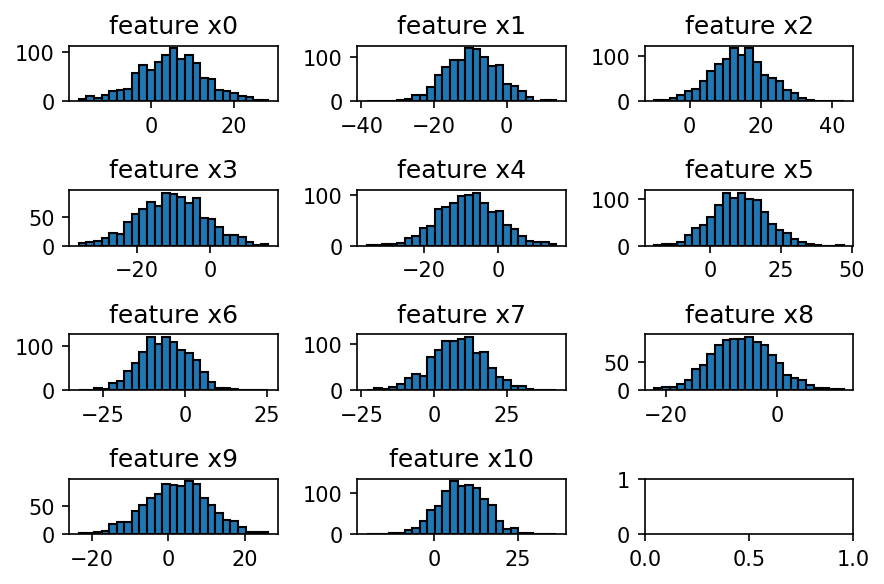

In [14]:
plot_feature_hist(X)
plt.tight_layout()

In [15]:
[mu, sigma2] = estimate_gaussian(X)

In [16]:
p = estimate_multivariate_gaussian_density(X, mu, sigma2)

In [17]:
pval = estimate_multivariate_gaussian_density(Xval, mu, sigma2)

In [18]:
epsilon, f1 = select_threshold(yval, pval)
print(f'''Best epsilon found using cross-validation: {epsilon:e}
Best F1 on Cross Validation Set: {f1:f}
# Outliers found: {(p < epsilon).sum()}
    (you should see a value epsilon of about 1.38e-18)
''')

Best epsilon found using cross-validation: 1.378607e-18
Best F1 on Cross Validation Set: 0.615385
# Outliers found: 117
    (you should see a value epsilon of about 1.38e-18)

